# Deepdive notebook converted to plot proper figures

In [1]:
# from env_figs import Environment
# from emv_lite import build_and_run
from model import NN
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
total_returns = np.load("multi_syll_robust.npy")

In [3]:
total_returns.shape
params_path = "params.json"
with open(params_path, "r") as f:
    parameters = json.load(f)

In [4]:
np.mean(total_returns[:, 0, :], axis=0).mean()

0.9206885416129933

In [5]:
total_returns.shape

(100, 2, 4)

/tmp/ipykernel_38157/956366280.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


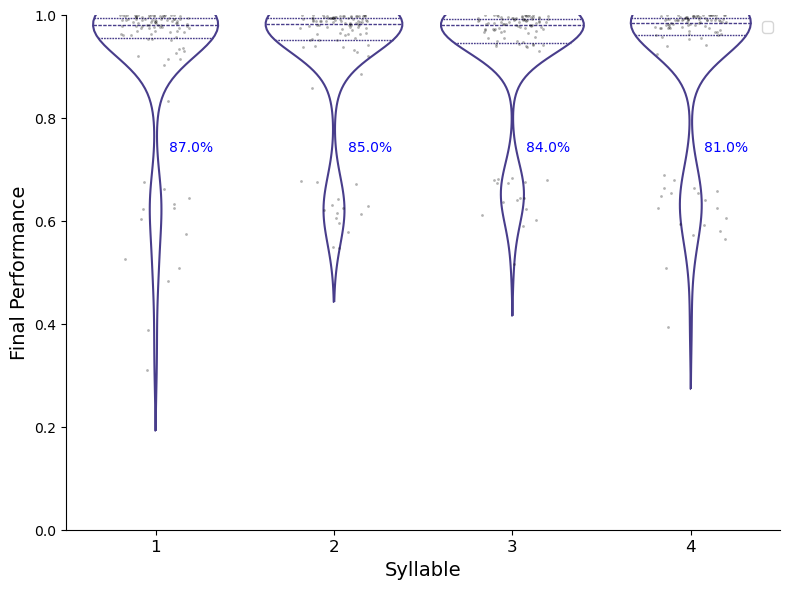

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_results_violin(returns_no_cut, params, label, xlabels=None):
    # Extract returns for the first group (i.e., [:, 0, :])
    returns_no_cut = returns_no_cut[:, 0, :]  # Now shape is (25, 4), 25 returns for 4 syllables

    sorted_params = np.arange(params)
    sorted_indices = np.argsort(sorted_params)
    
    returns_no_cut = returns_no_cut[:, sorted_indices]  # Sorting according to the params
    sorted_params = sorted_params[sorted_indices]

    n_values = len(sorted_params)
    above_threshold2 = np.zeros(n_values)
    
    # Flatten data for seaborn
    data2 = []
    labels = []

    for i in range(n_values):
        col2 = returns_no_cut[:, i]
        above_threshold2[i] = np.sum(col2 > 0.7) / len(col2)

        # Prepare data for plotting
        data2.extend(col2)
        labels.extend([sorted_params[i]] * len(col2))

    # Plotting
    plt.figure(figsize=(2 * n_values, 6))

    # Plot the violin plot
    ax = sns.violinplot(x=labels, y=data2, inner='quartile', color='darkslateblue', fill=False, alpha=1, split=False, inner_kws={'linewidth': 1, 'color': 'darkslateblue', 'alpha': 1})  

    # Overlay strip plot for raw data points
    sns.stripplot(x=labels, y=data2, size=2, color='black', alpha=0.3, jitter=0.2)

    # Add threshold line and annotations
    for i in range(n_values):
        plt.text(i + 0.2, 0.73, f"{100 * above_threshold2[i]:.1f}%", ha='center', va='bottom', fontsize=10, color='blue')

    # Labeling and axis formatting
    plt.xlabel(label, fontsize=14)
    plt.ylabel('Final Performance', fontsize=14)
    plt.ylim(0, 1)

    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Set xlabels
    if xlabels is not None:
        plt.xticks(ticks=range(n_values), labels=xlabels, fontsize=12)

    # Add legend and layout
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage
plot_results_violin(total_returns, 4, "Syllable", xlabels=["1", "2", "3", "4"])


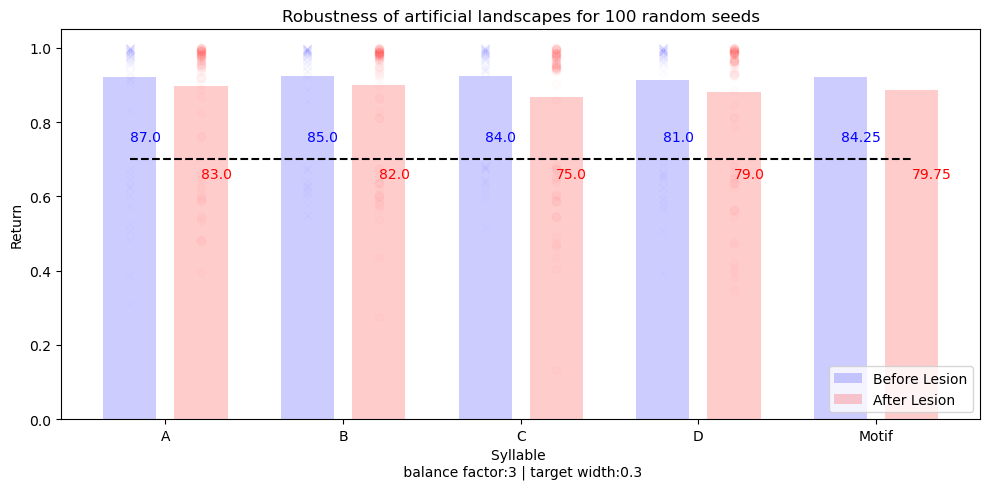

In [7]:
width = 0.2
plt.figure(figsize=(10, 5))
# above 0.7 count as success total count
success_before = np.zeros(4)
success_after = np.zeros(4)
for i in range(4):  
    success_before[i] = len(np.where(total_returns[:, 0, i] > 0.7)[0])/total_returns.shape[0]*100
    success_after[i] = len(np.where(total_returns[:, 1, i] > 0.7)[0])/total_returns.shape[0]*100    
    plt.text(i-width, 0.75, str(success_before[i]), color='b')
    plt.text(i+width, 0.65, str(success_after[i]), color='r')
plt.text(4-width, 0.75, str(success_before.mean()), color='b')
plt.text(4+width, 0.65, str(success_after.mean()), color='r')
plt.hlines(0.7, 0-width, 4+width, color='k', linestyles='--')
for i in range(4):
    plt.plot(i*np.ones_like(total_returns[:, 0, i])-width, total_returns[:, 0, i], 'x', alpha = 0.01, color='b')
    plt.plot(i*np.ones_like(total_returns[:, 1, i])+width, total_returns[:, 1, i], 'o', alpha = 0.01, color='r')
plt.bar(np.arange(4)-width, np.mean(total_returns[:, 0, :], axis=0), color='b', alpha=0.2, width=0.3, label='Before Lesion')
plt.bar(4-width, np.mean(total_returns[:, 0, :], axis=0).mean(), color='b', alpha=0.2, width=0.3)
plt.bar(4+width, np.mean(total_returns[:, 1, :], axis=0).mean(), color='r', alpha=0.2, width=0.3)
plt.bar(np.arange(4)+width, np.mean(total_returns[:, 1, :], axis=0), color='r', alpha=0.2, width=0.3, label='After Lesion')   
plt.xticks(np.arange(5), ['A', 'B', 'C', 'D','Motif'])  
plt.ylabel('Return')    
plt.xlabel(f'Syllable \n balance factor:{parameters['params']['balance_factor']} | target width:{parameters['params']['TARGET_WIDTH']}')
plt.legend(loc="lower right")
plt.title(f'Robustness of artificial landscapes for {total_returns.shape[0]} random seeds')
plt.tight_layout()
plt.show()